In [2]:
# Import required packages
import h5py # reading given files
import numpy as np # converting data to array 
import matplotlib.pyplot as plt # displaying missclassified labels
from sklearn.linear_model import LogisticRegression # classification model: logistic regression
from sklearn.metrics import accuracy_score # report accuracy of regression model 

In [40]:
# This function is to load data
def load_data(file_path):
    with h5py.File(file_path, 'r') as file: # Load data from the train data file
        train_set_x_orig = np.array(file['train_set_x'][:169])  # 169 train images
        train_set_y = np.array(file['train_set_y'][:169])  # 169 train labels
        test_set_x_orig = np.array(file['train_set_x'][169:]) # 40 test images
        test_set_y = np.array(file['train_set_y'][169:]) # 40 test labels
        classes = np.array(file['list_classes'][:])  # Class labels
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes 
# It returns train x, train y, test x, test y, and class labels from 'train' data file

In [42]:
# This function is for preprocessing data for regression
def preprocess_data(train_set_x_orig, train_set_y, test_set_x_orig, test_set_y):
    # Flatten and normalize the images
    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1) # Multidimensional data to 2D array
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1) 
    
    # Reshape labels
    train_set_y = train_set_y.reshape(-1, 1).ravel() 
    test_set_y = test_set_y.reshape(-1, 1).ravel()
    
    return train_set_x_flatten, train_set_y, test_set_x_flatten, test_set_y

In [34]:
def train_logistic_regression(train_x, train_y):
    model = LogisticRegression(max_iter=2000)
    model.fit(train_x,train_y)
    return model

In [38]:
def model_evaluation(model, test_x, test_y):
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions) # Report accuracy score
    print(f"Accuracy of the model: {accuracy}")
    misclassified_indices = np.where(predictions !=  test_y)[0] # Find indices where the prediction and the actual label does not match
    print(f"\nMissclassified Indices: {misclassified_indices}") # Report indices of missclassified predictions
    return misclassified_indices

In [48]:
# This function is to display images misclassified predictions
def display_misclassified_images(test_x_orig, test_y, predictions, misclassified_indices, classes):
    plt.figure(figsize=(10, 10)) # Set figure size
    n = len(misclassified_indices)
    for i, idx in enumerate(misclassified_indices[:n]):  # Show all misclassified images
        image = test_x_orig[idx]  # Retrieve the original image
        if image.ndim == 1:  # If image is flattened, reshape it
            image = image.reshape(64, 64, 3)  # Adjust dimensions as needed for your dataset
        
        plt.subplot(int(n/2), 2, i + 1) # Plots of 5 rows and 2 columns
        plt.imshow(image.astype('uint8'))  # Ensure correct data type for display
        true_label = classes[test_y[idx]]
        pred_label = classes[predictions[idx]]
        plt.title(f"True: {true_label}, Pred: {pred_label}") # Title of each plot displays true label and predicted label
        plt.axis('off') # Hide x and y axis for each plot 

    plt.tight_layout()
    plt.show()

Accuracy of the model: 0.45

Missclassified Indices: [ 0  1  2  3  6  8 10 12 14 16 19 23 26 27 28 29 31 35 36 37 38 39]


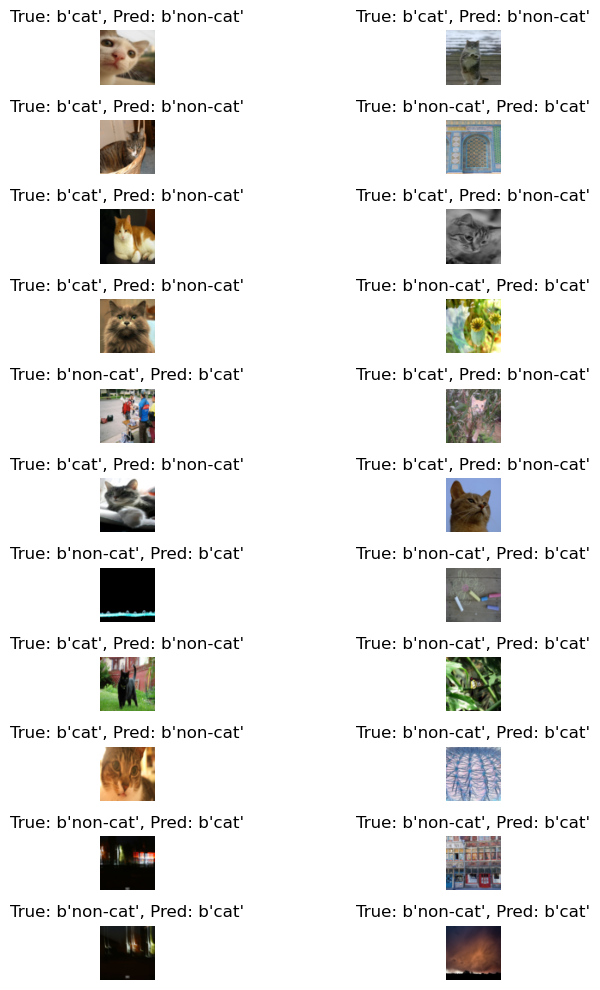

In [50]:
file_path = '/Users/chaeeunshin/Desktop/AMS595/train_catvnoncat.h5'
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_data(file_path)
train_x, train_y, test_x, test_y = preprocess_data(train_set_x_orig, train_set_y, test_set_x_orig, test_set_y)
model = train_logistic_regression(train_x, train_y)
misclassified_indices = model_evaluation(model, test_x, test_y)
display_misclassified_images(test_set_x_orig, test_y, model.predict(test_x), misclassified_indices, classes)